# Install and Imports

In [1]:
!pip install pandas seaborn pyarrow

In [2]:
import data_essentials_utils as desu

In [3]:
packages = []
desu.install_packages(packages)
desu.import_packages(packages)

# Extraction

In [19]:
df_train = desu.extract("Raw data/train.csv")
df_test = desu.extract("Raw data/test.csv")

CSV train data extraction successful.
CSV test data extraction successful.


# Data Preprocessing

In [5]:
desu.info(df_train,"train data")


---Info-train-data--------------------------------------------
---Duplicated values: 0
---Fully empty rows: 0

---Dataframe info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

---Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex             

No duplicates or completely null rows were found. The dataframe has dimensions of 891×12. The `Age` column contains 177 null values, so it will be filled with the mean value ("29.7"), the `Cabin` column contains 687 null values, and the `Embarked` column contains 2 null values, so they will be droped. Since the `Cabin` column has a high percentage of missing values (77.1%), it will be dropped.

In [6]:
desu.fill_with_mean(df_train,"Age",2)

"Column 'Age' has been filled with the mean value: 29.70. Column: 'Age_missing' has been created."

In [7]:
df_train = df_train.dropna(subset=["Embarked"])


In [8]:
df_train = df_train.drop(columns=["Cabin"])

## Row checking train data

Check for columns with significant data, or rows with no value for model.


=== Univariate Analysis for 'Age' ===
Type: Numeric

Descriptive Statistics:
count    889.000000
mean      29.653622
std       12.968367
min        0.420000
25%       22.000000
50%       29.700000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Skewness: 0.43
Kurtosis: 0.98


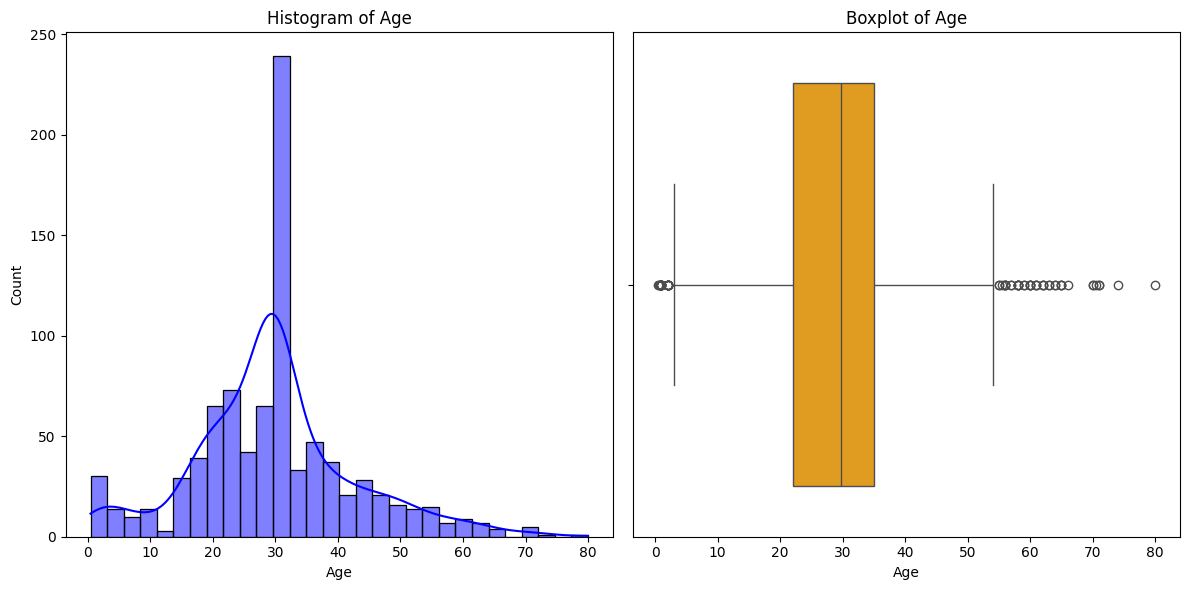

In [9]:
desu.univariate(df_train,"Age")

In [10]:
desu.unique_count_all_columns(df_train)

Column: PassengerId - All values are different
--------------------------------------------------
Column: Survived - Unique values: 0, 1
--------------------------------------------------
Column: Pclass - Unique values: 1, 2, 3
--------------------------------------------------
Column: Name - All values are different
--------------------------------------------------
Column: Sex - Unique values: female, male
--------------------------------------------------
Column: Age - Unique values: 0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 29.7, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 7

* `Pclass` has only 3 values, may be usefull to segment survivors.
* `Name` has no value to the model, so it will be dropped.
* `Sex` has only 2 values, may be usefull to segment survivors.
* `Age` may be usefull to segment survivors, but it needs splitting.
* `SibSp` has only 7 values, may be usefull to segment survivors.
* `Parch` has only 7 values, may be usefull to segment survivors.
* `Ticket` has no value to the model, so it will be dropped.
* `Fare` may be usefull to segment survivors, but it needs splitting.
* `Embarked` has only 3 values, may be usefull to segment survivors.

In [11]:
df_train = df_train.drop(columns=["Name"])
df_train = df_train.drop(columns=["Ticket"])

In [12]:
# Age segmentaton (by 10 years?)

In [13]:
# Fare segmentation (dont know how to segment)

## Error-handling Modifications

Count unique values by column

In [14]:
desu.unique_count(df_train, "Survived")
desu.unique_count(df_train, "Pclass")
desu.unique_count(df_train, "Sex")
desu.unique_count(df_train, "Age")
desu.unique_count(df_train, "SibSp")
desu.unique_count(df_train, "Parch")
desu.unique_count(df_train, "Fare")
desu.unique_count(df_train, "Embarked")


Unique values in 'Survived' (total 889):
0: 549 times (61.75%)
1: 340 times (38.25%)

Unique values in 'Pclass' (total 889):
3: 491 times (55.23%)
1: 214 times (24.07%)
2: 184 times (20.70%)

Unique values in 'Sex' (total 889):
male: 577 times (64.90%)
female: 312 times (35.10%)

Unique values in 'Age' (total 889):
29.7: 177 times (19.91%)
24.0: 30 times (3.37%)
22.0: 27 times (3.04%)
18.0: 26 times (2.92%)
28.0: 25 times (2.81%)
30.0: 25 times (2.81%)
19.0: 25 times (2.81%)
21.0: 24 times (2.70%)
25.0: 23 times (2.59%)
36.0: 22 times (2.47%)
29.0: 20 times (2.25%)
32.0: 18 times (2.02%)
26.0: 18 times (2.02%)
35.0: 18 times (2.02%)
27.0: 18 times (2.02%)
31.0: 17 times (1.91%)
16.0: 17 times (1.91%)
23.0: 15 times (1.69%)
20.0: 15 times (1.69%)
34.0: 15 times (1.69%)
33.0: 15 times (1.69%)
39.0: 14 times (1.57%)
42.0: 13 times (1.46%)
17.0: 13 times (1.46%)
40.0: 13 times (1.46%)
45.0: 12 times (1.35%)
2.0: 10 times (1.12%)
38.0: 10 times (1.12%)
50.0: 10 times (1.12%)
4.0: 10 times 

* 1 of each 3 persons survived.
* From every 4 persons, 1 is first class, 1 is second class and 2 are third class.
* From every 3 persons, 1 was female and 2 where male.
* at least 1 of every 3 persons was between 18 and 36 years, young adults and adults. (close to mean)
* 2 of every 3 persons had no siblings or spouces on the ship.
* 2 of every 3 persons had no parents or childrens on the ship
* nearly 1 of every 3 persons paid a fare under 26.55 (less than mean)
* 3 of every 4 persons embarked in Southarton

Percentages by Survived

In [15]:
# Calculate total number of survivors
survived_count = df_train['Survived'].sum()
total_count = df_train['Survived'].count()

# Calculate total survival percentage
survival_percentage = (survived_count / total_count) * 100

# Helper function to calculate group survival percentages
def calculate_survival_percentage(group_by):
    """Calculate survival percentages by group."""
    survived_percentage = (
        df_train[df_train['Survived'] == 1].groupby(group_by).size() / survived_count * 100
    )
    return survived_percentage

# Calculate survival statistics by Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, and Embarked
survived_by_pclass_survived = calculate_survival_percentage('Pclass').sort_values(ascending=False)
survived_by_sex_survived = calculate_survival_percentage('Sex').sort_values(ascending=False)
survived_by_age_survived = calculate_survival_percentage('Age').sort_values(ascending=False)
survived_by_sibsp_survived = calculate_survival_percentage('SibSp').sort_values(ascending=False)
survived_by_parch_survived = calculate_survival_percentage('Parch').sort_values(ascending=False)
survived_by_fare_survived = calculate_survival_percentage('Fare').sort_values(ascending=False)
survived_by_embarked_survived = calculate_survival_percentage('Embarked').sort_values(ascending=False)

# Print results
print(f"Survived: {survived_count}")
print(f"Total passengers: {total_count}")
print(f"Survival percentage (of total passengers): {survival_percentage:.2f}%")

print("\nSurvival by Pclass (percentages/survived):")
print(survived_by_pclass_survived)

print("\nSurvival by Sex (percentages/survived):")
print(survived_by_sex_survived)

print("\nSurvival by Age (percentages/survived):")
print(survived_by_age_survived.to_string())

print("\nSurvival by SibSp (percentages/survived):")
print(survived_by_sibsp_survived)

print("\nSurvival by Parch (percentages/survived):")
print(survived_by_parch_survived)

print("\nSurvival by Fare (percentages/survived):")
print(survived_by_fare_survived.to_string())

print("\nSurvival by Embarked (percentages/survived):")
print(survived_by_embarked_survived)


Survived: 340
Total passengers: 889
Survival percentage (of total passengers): 38.25%

Survival by Pclass (percentages/survived):
Pclass
1    39.411765
3    35.000000
2    25.588235
dtype: float64

Survival by Sex (percentages/survived):
Sex
female    67.941176
male      32.058824
dtype: float64

Survival by Age (percentages/survived):
Age
29.70    15.294118
24.00     4.411765
36.00     3.235294
35.00     3.235294
27.00     3.235294
22.00     3.235294
30.00     2.941176
19.00     2.647059
32.00     2.647059
18.00     2.647059
29.00     2.352941
31.00     2.352941
28.00     2.058824
4.00      2.058824
40.00     1.764706
33.00     1.764706
25.00     1.764706
26.00     1.764706
17.00     1.764706
42.00     1.764706
34.00     1.764706
16.00     1.764706
48.00     1.764706
1.00      1.470588
23.00     1.470588
45.00     1.470588
39.00     1.470588
21.00     1.470588
3.00      1.470588
50.00     1.470588
38.00     1.176471
49.00     1.176471
15.00     1.176471
5.00      1.176471
20.00     0.

* A survivor is more likely to be from 1st class, then 3rd class and lastly 2nd class, not by much.
* A survivor is twice as likely to be a female.
* Age needs to be segmented in groups to be easily analysed.
* A survivor is twice as likely to not have siblings or spouse on the ship, after that, is very likely to only have 1, sibling or spouce, 2 or more is rare.
* A survivor is twice as likely to not have parents or children on the ship, after that, is very likely to only have 1 or 2, parent or children, 3 or more is rare.
* Fare needs to be segmented in groups to be easily analysed.
* A survivor is twice as likely to have Embarked in Southarton than anywhere else, then there is a chance it embarked in Queenstown, if it embarked in Cherbourg it probably won't survive


# Transform

In [16]:
desu.clean(df_train, "train data")


---Cleaning-train-data----------------------------------------
0 duplicate rows removed.
0 missing values removed.
Index reset.


## New rows creation

## External Data enrichment

# Load

In [17]:
df_train.to_parquet('dataframes/df_train.parquet', index=False)
df_test.to_parquet('dataframes/df_test.parquet', index=False)